In [4]:
url='C:/Temp/bike-sharing-demand/test.csv'
import pandas
data=pandas.read_csv(url)
train=pandas.read_csv('C:/Temp/bike-sharing-demand/train.csv')

In [6]:
#时间特征处理  "2011-01-20 00:00:00"时间字段的格式是这样的，日期+时间
#创建一个新的表框
periodDf=train[['datetime','season','holiday','workingday','count']]
#避免报错
periodDf.is_copy = None
#日期处理，把日期提取出来（用匿名函数分离出来）
periodDf['date']=periodDf['datetime'].apply(lambda x: x.split()[0])
periodDf['time']=periodDf['datetime'].apply(lambda x: x.split()[1])
periodDf['year']=periodDf['date'].apply(lambda x: x.split('-')[0])
periodDf['month']=periodDf['date'].apply(lambda x: x.split('-')[1])
periodDf['day']=periodDf['date'].apply(lambda x: x.split('-')[2])
periodDf['hour']=periodDf['time'].apply(lambda x: x.split(':')[0])
#星期
periodDf['weekday']=periodDf['datetime'].apply(lambda x: pandas.to_datetime(x).weekday())
#看看处理后的periodDf
periodDf.head()

,datetime,season,holiday,workingday,count,date,time,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,16,2011-01-01,00:00:00,2011,01,01,00,5
1,2011-01-01 01:00:00,1,0,0,40,2011-01-01,01:00:00,2011,01,01,01,5
2,2011-01-01 02:00:00,1,0,0,32,2011-01-01,02:00:00,2011,01,01,02,5
3,2011-01-01 03:00:00,1,0,0,13,2011-01-01,03:00:00,2011,01,01,03,5
4,2011-01-01 04:00:00,1,0,0,1,2011-01-01,04:00:00,2011,01,01,04,5


(0.0, 11.0)

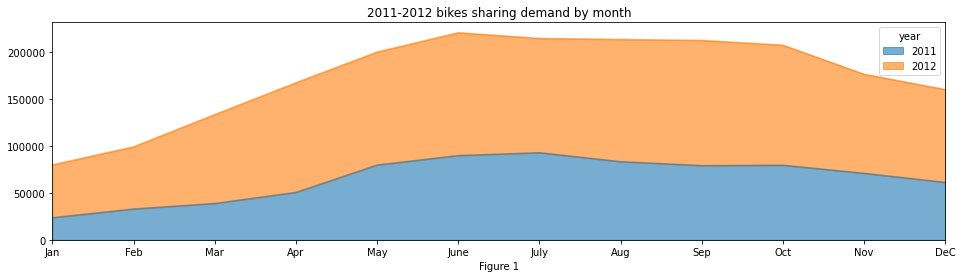

In [11]:

#绘图
fig1=plt.figure(figsize=(16,4))
ax1=plt.subplot(111)
df1=periodDf.groupby(['month','year']).sum().unstack()['count']#unstack(),将列索引变为行索引
df1.plot(kind='area',ax=ax1,alpha=0.6)
ax1.set_title('2011-2012 bikes sharing demand by month')
ax1.set_xlabel('Figure 1')
ax1.set_xticks(list(range(12)))
ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','DeC'])
ax1.set_xlim(0,11)

(0.0, 800.0)

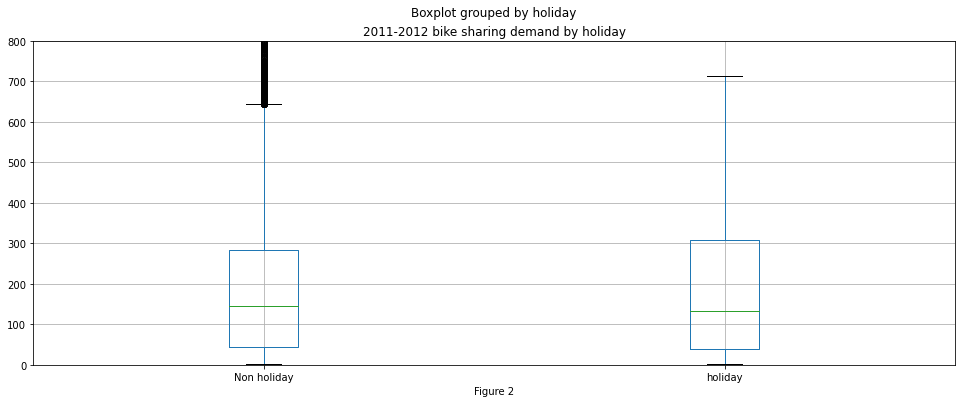

In [12]:
fig2=plt.figure(figsize=(16,6))
ax2=plt.subplot(111)
df2=periodDf[['count','holiday']]
df2.boxplot(by='holiday',ax=ax2)
ax2.set_title('2011-2012 bike sharing demand by holiday')
ax2.set_xlabel('Figure 2')
ax2.set_xticklabels(['Non holiday','holiday'],rotation='horizontal')
ax2.set_ylim(0,800)

(0.0, 800.0)

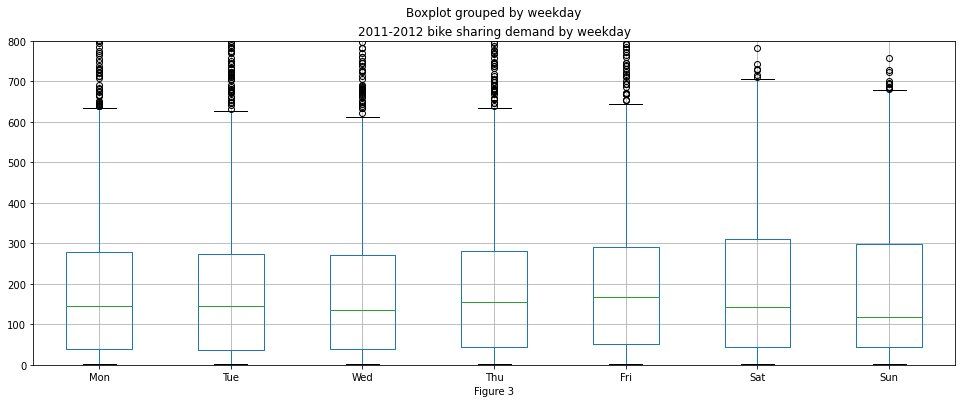

In [13]:
fig3=plt.figure(figsize=(16,6))
ax3=plt.subplot(111)
df3=periodDf[['count','weekday']]
df3.boxplot(by='weekday',ax=ax3)
ax3.set_title('2011-2012 bike sharing demand by weekday')
ax3.set_xlabel('Figure 3')
ax3.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation='horizontal')
ax3.set_ylim(0,800)

(0.0, 23.0)

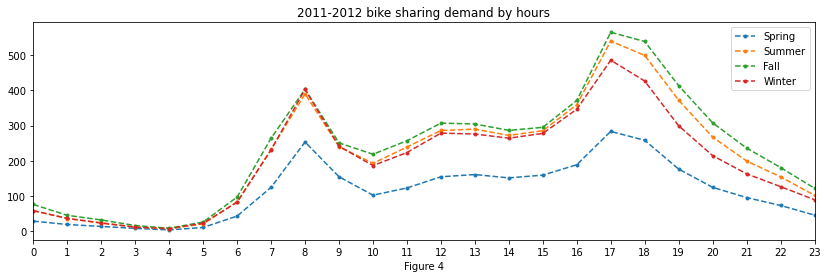

In [15]:
fig4=plt.figure(figsize=(14,4))
ax4=plt.subplot(111)
df4=periodDf.groupby(['hour', 'season']).mean().unstack()['count']
df4.columns=['Spring','Summer','Fall','Winter']
df4.plot(ax=ax4, style='--.')
ax4.set_title('2011-2012 bike sharing demand by hours')
ax4.set_xlabel('Figure 4')
ax4.set_xticks(list(range(24)))
ax4.set_xticklabels(list(range(24)))
ax4.set_xlim(0,23)

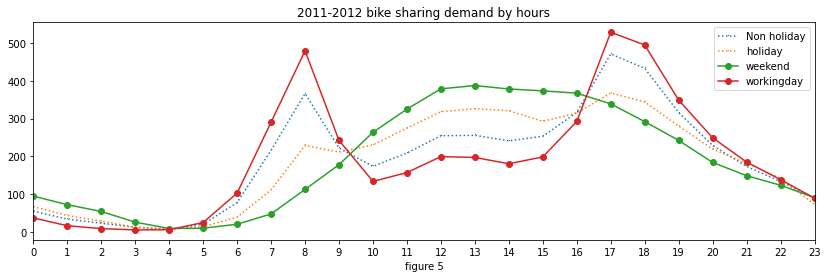

In [16]:
fig5=plt.figure(figsize=(14,4))
ax5=plt.subplot(111)
df51=periodDf.groupby(['hour','holiday']).mean().unstack()['count'].rename(columns={0:'Non holiday',1:'holiday'})
df52=periodDf.groupby(['hour','workingday']).mean().unstack()['count'].rename(columns={0:'weekend',1:'workingday'})
df51.plot(ax=ax5,style=':,')
df52.plot(ax=ax5,style='-o')
ax5.set_title('2011-2012 bike sharing demand by hours')
ax5.set_xlabel('figure 5')
ax5.set_xticks(list(range(24)))
ax5.set_xticklabels(list(range(24)))
ax5.set_xlim(0,23)
ax5.legend()
plt.show()

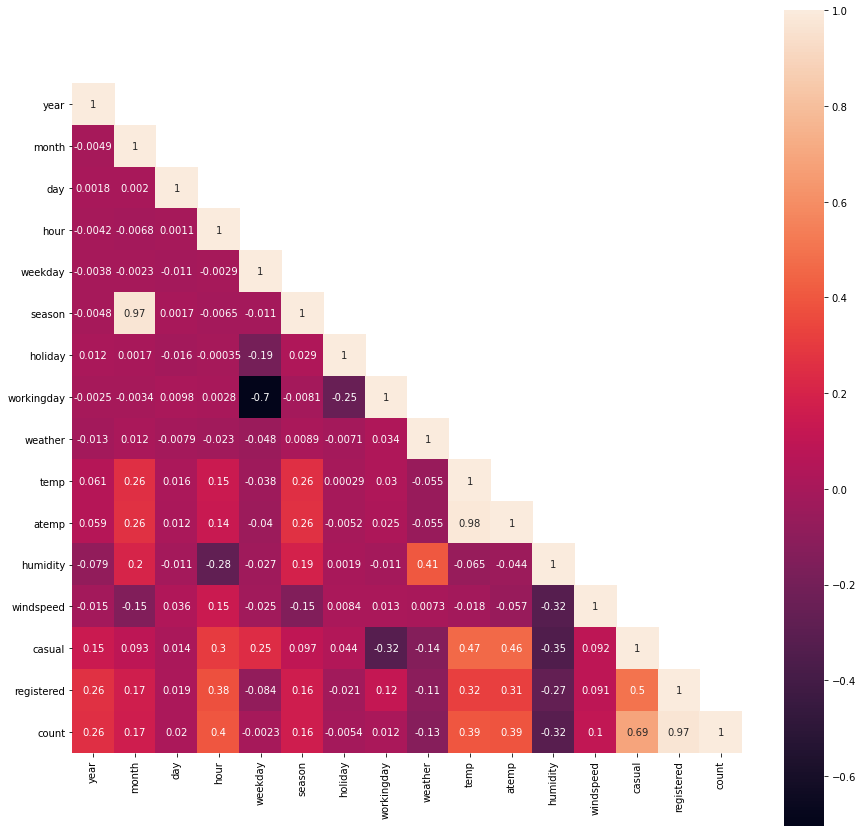

In [21]:
import pandas as pd
import seaborn as sn
import numpy as np
#查看租车数量和其它变量的相关性
df=pd.concat([periodDf.iloc[:,-5:].astype(int),train.iloc[:,1:]],axis=1)
corrDf=df.corr()
mask=np.array(corrDf)
mask[np.tril_indices_from(mask)]=False
fig=plt.figure(figsize=(15,15))
sn.heatmap(corrDf,mask=mask,annot=True,square=True)
plt.show()

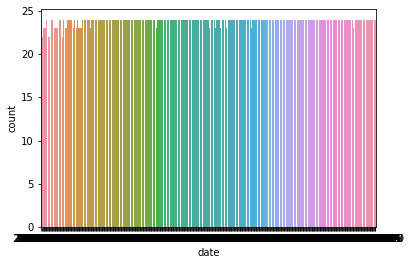

In [7]:
import seaborn
import matplotlib.pyplot as plt 
seaborn.countplot(periodDf['date'])

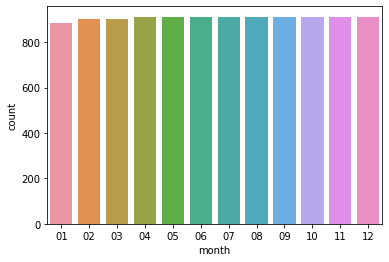

In [8]:
seaborn.countplot(periodDf['month'])

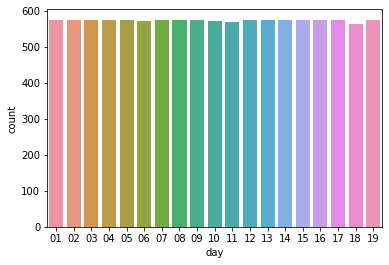

In [9]:
seaborn.countplot(periodDf['day'])

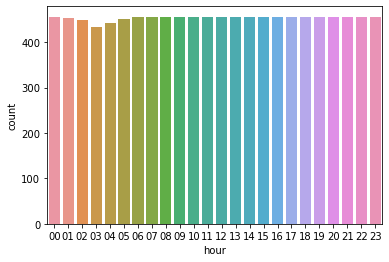

In [10]:
seaborn.countplot(periodDf['hour'])

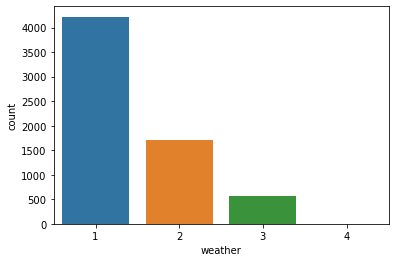

In [3]:
import seaborn
import matplotlib.pyplot as plt 
seaborn.countplot(data['weather'])

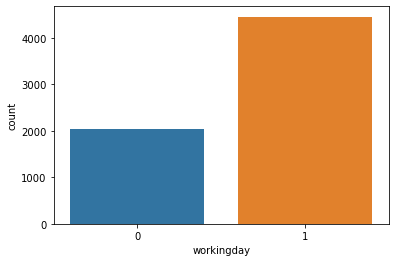

In [5]:
seaborn.countplot(data['workingday'])

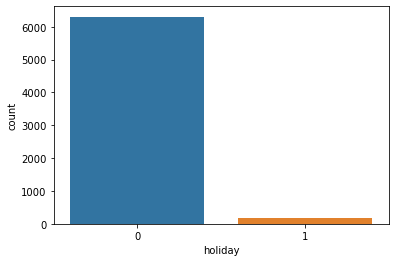

In [7]:
seaborn.countplot(data['holiday'])

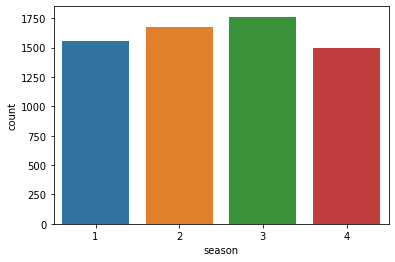

In [8]:
seaborn.countplot(data['season'])

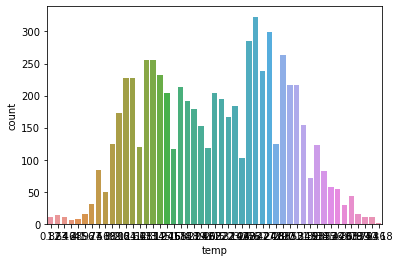

In [9]:
seaborn.countplot(data['temp'])